<a href="https://colab.research.google.com/github/daniyal9538/GeneralProjects/blob/master/SELANI_malaria_cell_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NOTE:
Even though training and test data was provided seperately, the test data is without labels, hence it could not be used to assertain the accuracy of the models

#Get Data

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle (1).json
User uploaded file "kaggle.json" with length 67 bytes


In [0]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria -p /content
!unzip \*.zip

#Get dependencies

In [0]:
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K
from sklearn.model_selection import train_test_split
from keras import optimizers
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils
import numpy as np 
import pandas as pd 


Using TensorFlow backend.


#Prepare Data

In [0]:
parasitized_data = os.listdir('../content/cell_images/Parasitized')


uninfected_data = os.listdir('../content/cell_images/Uninfected')


In [0]:
data = []
labels = []
for img in parasitized_data:
    try:
        img_read = plt.imread('../content/cell_images/Parasitized' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread('../content/cell_images/Uninfected' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

In [0]:

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 10)

As per advise from the professor, it is better to deal with a classification problem if the classes are in a one hot encoded array

In [0]:
y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

In [0]:
width = X_train[0].shape[1]
height = X_train[0].shape[0]
channels = X_train[0].shape[2]
classes = y_train[0].shape[0]

The widht, height, and number of channels of input image, and the number of classes (Binary Classification)

In [0]:
width, height, channels, classes

(50, 50, 3, 2)

The input data has to be a np array in order for keras to accept it

In [0]:
X_train = np.array(X_train)

#Fitting to CNN

Owing to the small size of image, convolution and pooling windows are kept small
The normalization and dropout layers are added after consulting the kernels and discussions present for this dataset
Accuracy goes from ~85% to ~96% after adding normalization layers
The arrangement of covolution and pooling layers with a dense layer at the end was done after reading the paper on AlexNet


In [0]:
model = Sequential()
    
inputShape = (height, width, channels)
chanDim = -1

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis = chanDim))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis = chanDim))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis = chanDim))
model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization(axis = chanDim))
model.add(Dropout(0.5))
model.add(Dense(classes, activation = 'softmax'))
  


Train model, get validation accuracy and plot training graph

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
CNN = model.fit(X_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
22046/22046 [==============================] - 8s 349us/step - loss: 0.5205 - acc: 0.7928
Epoch 2/20
22046/22046 [==============================] - 6s 285us/step - loss: 0.2203 - acc: 0.9179
Epoch 3/20
22046/22046 [==============================] - 6s 283us/step - loss: 0.1884 - acc: 0.9355
Epoch 4/20
22046/22046 [==============================] - 6s 283us/step - loss: 0.1729 - acc: 0.9402
Epoch 5/20
22046/22046 [==============================] - 6s 284us/step - loss: 0.1639 - acc: 0.9461
Epoch 6/20
22046/22046 [==============================] - 7s 321us/step - loss: 0.1610 - acc: 0.9462
Epoch 7/20
22046/22046 [==============================] - 7s 297us/step - loss: 0.1581 - acc: 0.9472
Epoch 8/20
22046/22046 [==============================] - 6s 282us/step - loss: 0.1508 - acc: 0.9513
Epoch 9/20
22046/22046 [==============================] - 6s 283us/step - loss: 0.1499 - acc: 0.9518
Epoch 10/20
22046/22046 [==============================] - 6s 283us/step - loss: 0.1502 - a

In [0]:
pred = model.evaluate(np.array(X_test), y_test)

5512/5512 [==============================] - 1s 129us/step


In [0]:
'Validation Loss and Accuracy',pred

('Validation Loss and Accuracy', [0.12780247321582153, 0.9566400580551524])

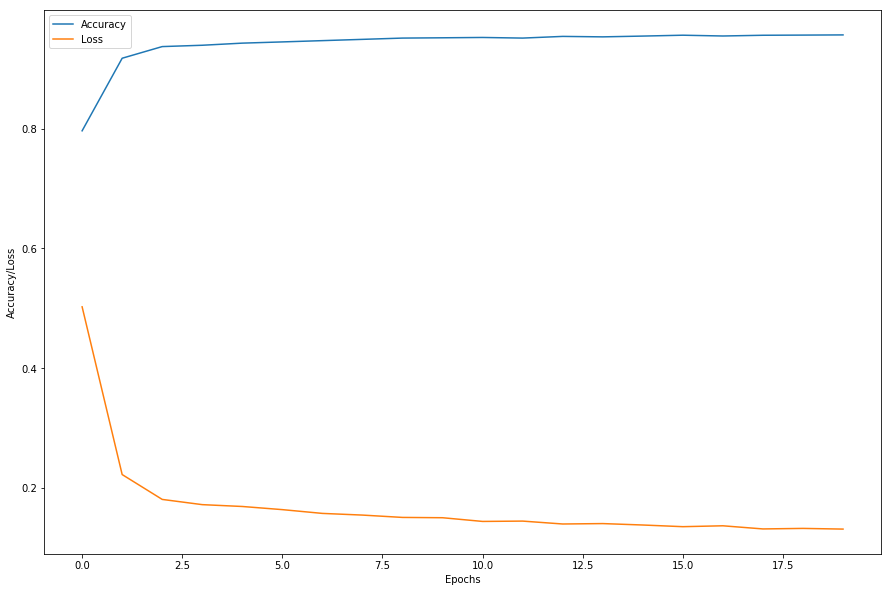

In [0]:
plt.figure(figsize = (15,10))
plt.plot(range(20), CNN.history['acc'], label = 'Accuracy')
plt.plot(range(20), CNN.history['loss'], label = 'Loss')
#ax1.set_xticks(np.arange(0, 31, 5))
plt.xlabel("Epochs")
plt.ylabel('Accuracy/Loss')

plt.legend(loc = "best")

#Transfer Learning

Going to use vgg16 as i have had experience working with this model before

In [0]:
vgg16 = keras.applications.vgg16.VGG16(include_top=False,input_shape = (height, width, channels))

Have to convert the keras engine training model to a sequential model so that it can be trained

In [0]:
type(model), type(vgg16)

(keras.engine.sequential.Sequential, keras.engine.training.Model)

Instantiate a new sequential mode and copy all layers from vgg16 into new model
Remove last layer (Which has 1000 classes in it)
Set all layers to not be trainable, so that when training over new model, we do not change the pretrained vgg16 layers
Add a flatten and dense layer to the model
The flatten layer flatten the output from the last vgg16 layer so it can be accepted by the new dense layer.
If this is not done the dimension of the vectors passed between the layers is incompatible
Add a dense layer with 2 outputs to suit over binary classification


In [0]:
tmodel = Sequential()


for layer in vgg16.layers:
  tmodel.add(layer)
  
tmodel.layers.pop()

for layer in tmodel.layers:
  layer.Trainable = False
  
tmodel.add(Flatten())
tmodel.add(Dense(classes, activation = 'softmax'))

Train model, get validation accuracy and plot training graph

In [0]:
tmodel.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
transfer = tmodel.fit(X_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
22046/22046 [==============================] - 39s 2ms/step - loss: 0.2605 - acc: 0.8869
Epoch 2/20
22046/22046 [==============================] - 36s 2ms/step - loss: 0.1449 - acc: 0.9561
Epoch 3/20
22046/22046 [==============================] - 35s 2ms/step - loss: 0.1453 - acc: 0.9551
Epoch 4/20
22046/22046 [==============================] - 35s 2ms/step - loss: 0.1313 - acc: 0.9577
Epoch 5/20
22046/22046 [==============================] - 35s 2ms/step - loss: 0.1327 - acc: 0.9590
Epoch 6/20
22046/22046 [==============================] - 35s 2ms/step - loss: 0.1248 - acc: 0.9606
Epoch 7/20
22046/22046 [==============================] - 35s 2ms/step - loss: 0.1238 - acc: 0.9600
Epoch 8/20
22046/22046 [==============================] - 35s 2ms/step - loss: 0.1389 - acc: 0.9572
Epoch 9/20
22046/22046 [==============================] - 35s 2ms/step - loss: 0.1204 - acc: 0.9604
Epoch 10/20
22046/22046 [==============================] - 35s 2ms/step - loss: 0.1112 - acc: 0.9627

Transfer learning does not require so many epochs to be trained as most layers are already frozen. Model performs very well

In [0]:
pred = tmodel.evaluate(np.array(X_test), y_test)
'Validation Loss and Accuracy',pred

5512/5512 [==============================] - 3s 541us/step


('Validation Loss and Accuracy', [0.21986304426698233, 0.9589985486211902])

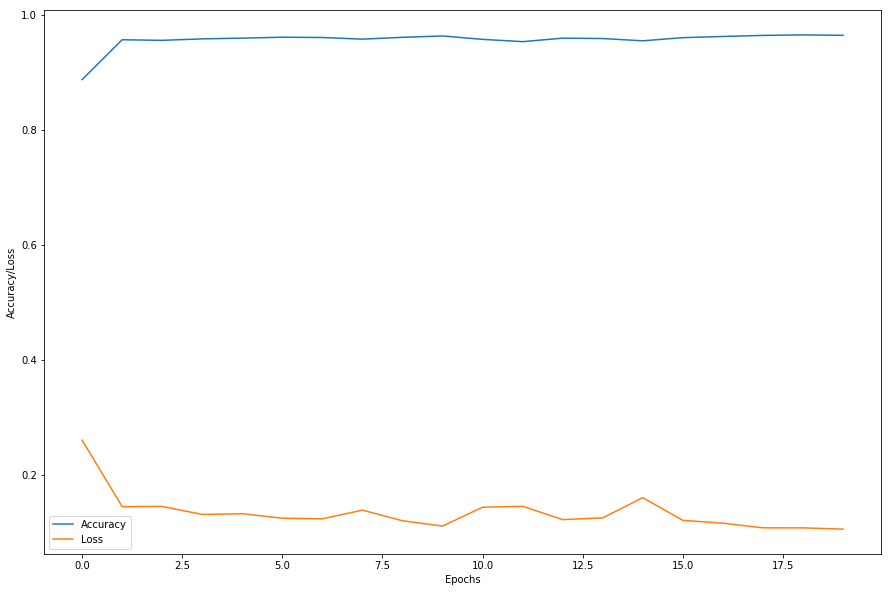

In [0]:
plt.figure(figsize = (15,10))
plt.plot(range(20), transfer.history['acc'], label = 'Accuracy')
plt.plot(range(20), transfer.history['loss'], label = 'Loss')
#ax1.set_xticks(np.arange(0, 31, 5))
plt.xlabel("Epochs")
plt.ylabel('Accuracy/Loss')

plt.legend(loc = "best")